In [43]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np
plt.style.use('dark_background')
import data
from sklearn.model_selection import KFold
from util.style import *
import itertools
from sklearn import mixture
from matplotlib_venn import venn3, venn2
import viz
import config
from tqdm import tqdm
outcome_def = 'y_consec_thresh'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = data.get_data()
df = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots
viz.print_metadata()

def sort_outcome(df, outcome_def):
    outcome_score = df['Y_max'].values
    idxs_sort = np.argsort(outcome_score)
    return df[outcome_def].values[idxs_sort], df['Y'].values[idxs_sort]

outcome_sort, Y_sort = sort_outcome(df, outcome_def)

valid:		2066 aux+ / 7594 (0.272)
----------------------------------------
hotspots:	 349 aux+ /  349
short:		 283 aux+ / 5697 (0.950)
long:		 108 aux+ /  113 (0.953)
hard:		1482 aux+ / 2936 (0.505)

lifetime threshes 15 161


In [3]:
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

# example

In [41]:
x0 = np.array(df['X'].iloc[5])
x1 = np.array(df['X'].iloc[2])
distance, path = fastdtw(x0, x1, dist=euclidean)
path = np.array(path)
print(distance)

23470.520544973737


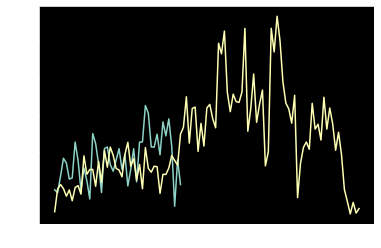

In [37]:
plt.plot(x0)
plt.plot(x1)

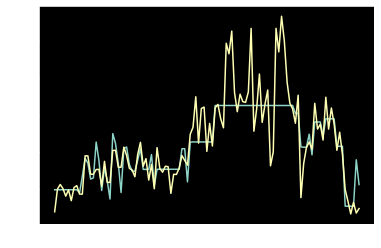

In [38]:
plt.plot(x0[path[:, 0]])
plt.plot(x1[path[:, 1]])